In [1]:
import myutil as mu
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset  # 텐서데이터셋
from torch.utils.data import DataLoader  # 데이터로더



--- 
 - 미니 배치와 데이터 로드(Mini Batch and Data Load) 
   - 이번 챕터에서 배우는 내용은 선형 회귀에 한정되는 내용은 아닙니다. 
   - 이번 챕터에서는 데이터를 로드하는 방법과 미니 배치 경사 하강법(Minibatch Gradient Descent)에 대해서 학습합니다. 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
batch_idx : 0

samples : 
    [tensor([[93., 88., 93.],
            [73., 66., 70.]]), tensor([[185.],
            [142.]])]

-------------------------------------------------------------------------------- 
epoch :    0/20 
cost : 11710.945312 
accuracy : 0.37 

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
batch_idx : 1

samples : 
    [tensor([[ 73.,  80.,  75.],
            [ 96.,  98., 100.]]), tensor([[152.],
            [196.]])]

-------------------------------------------------------------------------------- 
epoch :    0/20 
cost : 3677.169434 
accuracy : 0.65 

--------------------------------------------------------------------------------
--------------------------------------------------------------

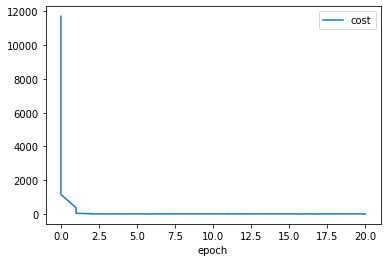

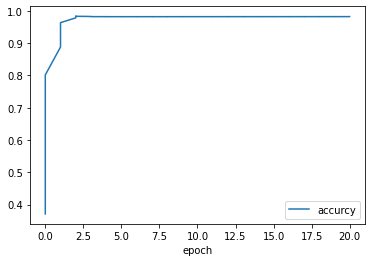


model : 
    Linear(in_features=3, out_features=1, bias=True) 
    weight    torch.Size([1, 3])
        tensor([[0.2162, 0.9562, 0.8357]])
    bias    torch.Size([1])
        tensor([0.0978])



In [2]:

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])

y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
model = nn.Linear(3, 1)
optimizer = optim.SGD(model.parameters(), lr=1e-5)
nb_epoches = 20
mu.plt_init()

for epoch in range(nb_epoches + 1):
    print("=" * 80)

    for batch_idx, samples in enumerate(dataloader):
        print("-" * 80)
        print("-" * 80)
        mu.log("batch_idx", batch_idx)
        mu.log("samples", samples)
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        accuracy = mu.get_regression_accuracy(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        mu.log_epoch(epoch, nb_epoches, cost, accuracy)

mu.plt_show()
mu.log("model", model)
